[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_03/blob/master/W03_A--DJ--Principal_Components_Analysis.ipynb)


https://youtu.be/KiyUey3Z_tI

https://youtu.be/zSpAZcGss0A

# Principal Components Analysis

Principal Components Analysis (PCA) is a matrix-based technique for identifying the most interesting dimensions of a dataset. Mathematically, PCA finds the projection that maximizes the variance of the data. 

Remember the example we've seen of generating points from a normal distribution in $n$ dimensions?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: covariance is not positive-semidefinite.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: covariance is not positive-semidefinite.


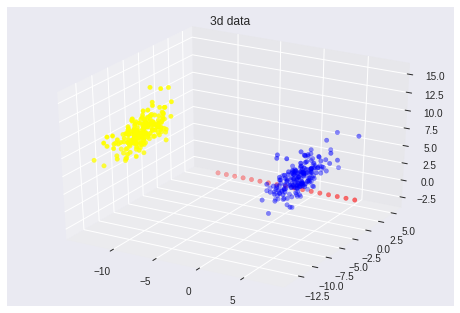

In [63]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = np.linspace(-8,8,17)  # create 17 values between -8 and 8
Z = np.repeat(np.array([1,0,0]).reshape(1,3),17,axis=0).T * x  ##
#print(np.array([1,0,0])) # create and array of 1, 0 and 0
#print(np.array([1,0,0]).reshape(1,3)) # places this array as the only member of another array
#print(np.array([1,0,0]).reshape(1,3),17) # print 17 on the same line ;)
#print(np.repeat(np.array([1,0,0]).reshape(1,3),17))      # repeat each element of the [1,0,0] array 17 times in one vector
#print(np.repeat(np.array([1,0,0]).reshape(1,3),17,axis=0))      # repeat each [1,0,0] array 17 times
#print(np.repeat(np.array([1,0,0]).reshape(1,3),17,axis=0).T)    # make an array of the containing 3 arrays each holding 17 elements of the [1,0,0] array
# see below!
# [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
# [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
# [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

points1 = np.random.multivariate_normal([1,1,1],[[1,0.1,2],[0.1,1,1.5],[1,2,1]],200) # create an array of 200 points[x,y,z] with origin [1,1,1]
points2 = np.random.multivariate_normal([-10,-10,10],[[1,0.1,2],[0.1,1,1.5],[1,2,1]],200)
#print(points1, points2)

colors = np.concatenate([np.repeat('red',17),np.repeat('blue',200),np.repeat('yellow',200)]) # make an array with 17 'red', followed by 200 'blue'
# followed by 200 'yellow'

from mpl_toolkits.mplot3d import Axes3D # import the 3D plotting library
#fig = plt.figure();
#ax = fig.add_subplot(111, projection='3d');

all_points = np.concatenate([Z.T,points1,points2],axis=0); # put all the points together
xa, ya, za = all_points.T # separate the points out into 3 variables for plotting

fig = plt.figure(); # create a plt.figure() object for the 3D plot
plt.figure
ax = fig.add_subplot(111, projection='3d'); # crate and ax object from add_subplt()
ax.scatter(xa, ya, za, c=colors); # color the data with the colors array created above
ax.set_title('3d data'); # set the title as "3D Data"



In $2d$ and $3d$ we can visualize these distributions and intuit them, but what do we do in $15d$, or greater? Frequently there are large numbers of dimensions in a high dimensional dataset that don't contribute much to the shape of the dataset. PCA gives us the ability to expose the covariance of each dimension, which vastly improves visualization techniques and can decrease the dimensionality of a dataset substantially.


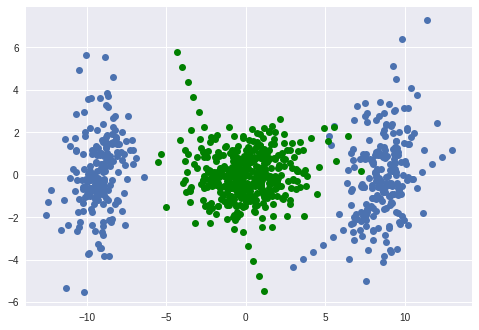

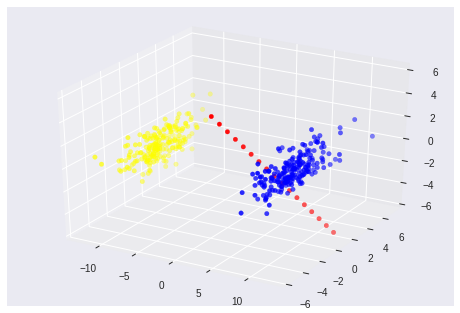

In [64]:
# Principal Components Analysis

#import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
 
model = PCA(n_components=2)
model.fit(all_points)

X_2D = model.transform(all_points)
#print(model.components_)
#print(np.sqrt(model.singular_values_))
#print(model.get_covariance())
xx, xy = X_2D.T
plt.plot(xx,xy,'o')

model = PCA(n_components=3)
model.fit(all_points)
X_3D = model.transform(all_points)
#print(model.components_)
#print(np.sqrt(model.singular_values_))
#print(model.get_covariance())
xx, xy, xz = X_3D.T
plt.plot(xy,xz,'og')
#print(xx,xy,xz)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx, xy, xz, c=colors)

In [73]:

# Principal Components Analysis

#import pandas as pd
#from sklearn.decomposition import PCA

'''
model = PCA(n_components=2)
model.fit(data)
X_2D = model.transform(data)
print(model.components_)
print(model.singular_values)
print(np.sqrt(model.singular_values_))
print(model.get_covariance())
'''

'\nmodel = PCA(n_components=2)\nmodel.fit(data)\nX_2D = model.transform(data)\nprint(model.components_)\nprint(model.singular_values)\nprint(np.sqrt(model.singular_values_))\nprint(model.get_covariance())\n'

# Assignment

Looking back at your carefully prepared and cleaned Titanic data, lets use PCA to look at the 2d and 3d projections of all of the features.

Use the example code above to create a PCA object with 2 components and plot the full 8D Titanic feature set using them. This projection maximizes the variance across all dimensions in your dataset. Without creating new features, this is the best "viewport" into the Titanic data that is available.

Do the same thing with a 3 component PCA and discuss the results.

Finally, experiment with the normalization techniques available in [scikit.preprocessing.normalize](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html) on the original dataset before building your PCA. Does normalization appear to benefit?



In [72]:
import seaborn as sns

'''
titanic0 = sns.load_dataset('titanic') # get the titanic data
#print(titanic0.shape)
#titanic0.head()
#print('Titanic Duplicates: ', titanic0.duplicated().sum())

titanic1 = titanic0.drop_duplicates() # Remove Duplicates

#print(titanic.shape)
#print('Titanic Duplicates: ', titanic.duplicated().sum())
#print('Titanic NANz: ', titanic.isna().sum())

titanic2 = titanic1.ffill().bfill()

#print('Embarked NANz', titanic_test['embarked'].isna().sum())

titanic2.isna().sum()
titanic2.iloc[:,2] = titanic2.iloc[:,2].map(dict(male=1, female=0))
titanic = titanic2.drop(['embarked','class', 'who','adult_male','deck','embark_town','alive','alone'],axis=1)
print(titanic.shape)
titanic.head()
#titanic = titanic_testr
'''

titanic = sns.load_dataset('titanic')
titanic = titanic.drop(['alive', 'adult_male', 'who', 'class', 'embark_town','deck'], axis=1)
titanic['embarked'] = titanic['embarked'].fillna(method='ffill')
titanic['age'] =titanic['age'].fillna(method='ffill')
from sklearn.preprocessing import LabelEncoder
#Convert binomials and categoricals to encoded labesl
for label in ['emboarked', 'sex', 'alone']:
  titanic[label] = LabelEncoder().fit_transform(titanic[lable])
colors = np.array(['red', 'blue'])[titanic['survivied']]
s



(784, 7)


,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


[[-27.65630931  -7.0722438    0.19630991]
 [ 36.77991297   7.31754765   0.05634952]
 [-26.87898178  -3.0808105   -0.53754521]
 ...
 [-11.53057471 -10.50633914   1.20370052]
 [ -4.79571112  -3.60686974  -0.99723459]
 [-26.90599111   2.92659867  -0.39507236]]


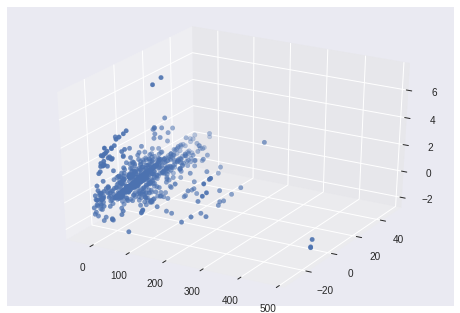

In [90]:
from sklearn.decomposition import PCA
model = PCA(n_components=3)
model.fit(titanic)
titanic_pca0 = model.transform(titanic)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#xx, xy, xz = titanic_pca0

ax.scatter(*titanic_pca0.T)
#ax.scatter(xx, xy, xz, 'o')
print(titanic_pca0)




# Thinking about your assignment

1. What is PCA, mathematically?
2. What does PCA do to a data set?
3. What "shape" does data have?
4. What steps are in the above PCA example?
5. What steps must I duplicate to apply PCA to Titanic?
6. Where is my Titanic dataset, and how can I use it here effectively?
7. What is my final objective in this assignment?

# Search terms

Other than the final question involving normalization, all of the techniques required for this assignment should be available here and in the previous assignments.

* scikit normalize data
* effects of normalizing data on PCA


# Stretch Goal

## Eigenfaces

One of the most interesting ways to understand PCA involves image processing. As you know, every image is in fact a single high dimensional point where each pixel is a dimension of the point. When presented with a collection of $m$ images in $n$ dimensions, where $n$ is the number of pixels per image, PCA produces a very interesting set of components.



In [0]:
!wget http://www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.zip -O att_faces.zip
!unzip att_faces.zip

(112, 92)
[0.188 0.192 0.176 0.184 0.192 0.224 0.153 0.165 0.208 0.192 0.208 0.235
 0.298 0.357 0.388 0.373 0.314 0.294 0.259 0.212 0.184 0.192 0.196 0.169
 0.18  0.208 0.239 0.275 0.329 0.412 0.522 0.51  0.431 0.369 0.318 0.42
 0.373 0.314 0.224 0.216 0.259 0.337 0.314 0.29  0.255 0.278 0.243 0.329
 0.204 0.29  0.278 0.263 0.251 0.345 0.267 0.278 0.294 0.259 0.224 0.239
 0.243 0.204 0.184 0.196 0.227 0.235 0.251 0.259 0.224 0.18  0.212 0.259
 0.314 0.314 0.267 0.278 0.341 0.251 0.302 0.259 0.325 0.302 0.227 0.18
 0.161 0.169 0.22  0.216 0.2   0.22  0.22  0.212]


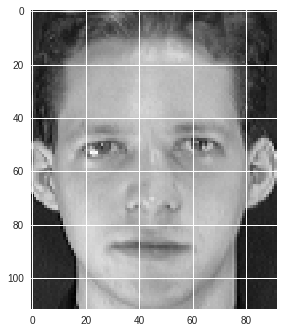

In [0]:
from scipy.misc import imread
import matplotlib.pyplot as plt
img = imread('s1/1.pgm')
img = img.astype(np.uint8)
img = img / 255
plt.imshow(img,cmap='gray')

![AT&T](https://www.dropbox.com/s/w9cvhuzyamme68q/Screenshot%202018-04-17%2015.01.38.png?raw=1)